## Определение стоимости недвижимости из набора данных Ames Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

#Необходимые ресурсы

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

Примите правила соревнования
"House Prices - Advanced Regression Techniques"

Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


## Настраиваем Kaggle API

Загружаем токен для аутентификации

In [3]:
file = files.upload()

Saving kaggle.json to kaggle.json


Копируем токен в каталог .kaggle

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

Загружаем данные с сайта Kaggle

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 95.5MB/s]


In [6]:
!unzip  house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Просматриваем данные

In [7]:
!head train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [8]:
# catenate - посмотрим на содержимое файла
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
!head test.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No

In [10]:
!head sample_submission.csv

Id,SalePrice
1461,169277.0524984
1462,187758.393988768
1463,183583.683569555
1464,179317.47751083
1465,150730.079976501
1466,177150.989247307
1467,172070.659229164
1468,175110.956519547
1469,162011.698831665


## Загружаем данные

In [11]:
train = pd.read_csv('train.csv')


In [12]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Выделяем метки (целевую переменную)

In [14]:
y_train = train['SalePrice']

In [15]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
type(y_train)

pandas.core.series.Series

## Описательная статистика (exploratory data analysis)

Исследуем целевую переменную

In [17]:
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

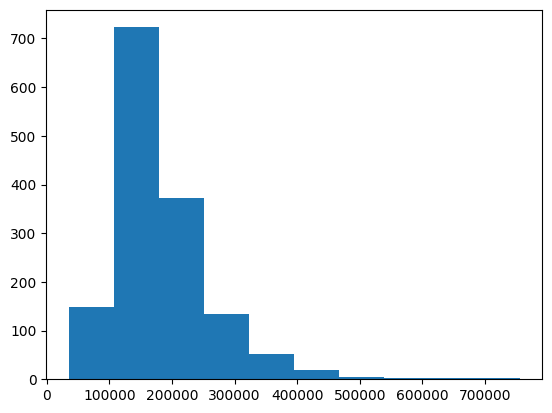

In [18]:
# строим целевую диаграмму
plt.hist(y_train)
plt.show()

##Визуализация матрицы корреляции

Влияние признаков на целевую переменную

Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции

https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

<ipython-input-19-0d536093bf39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

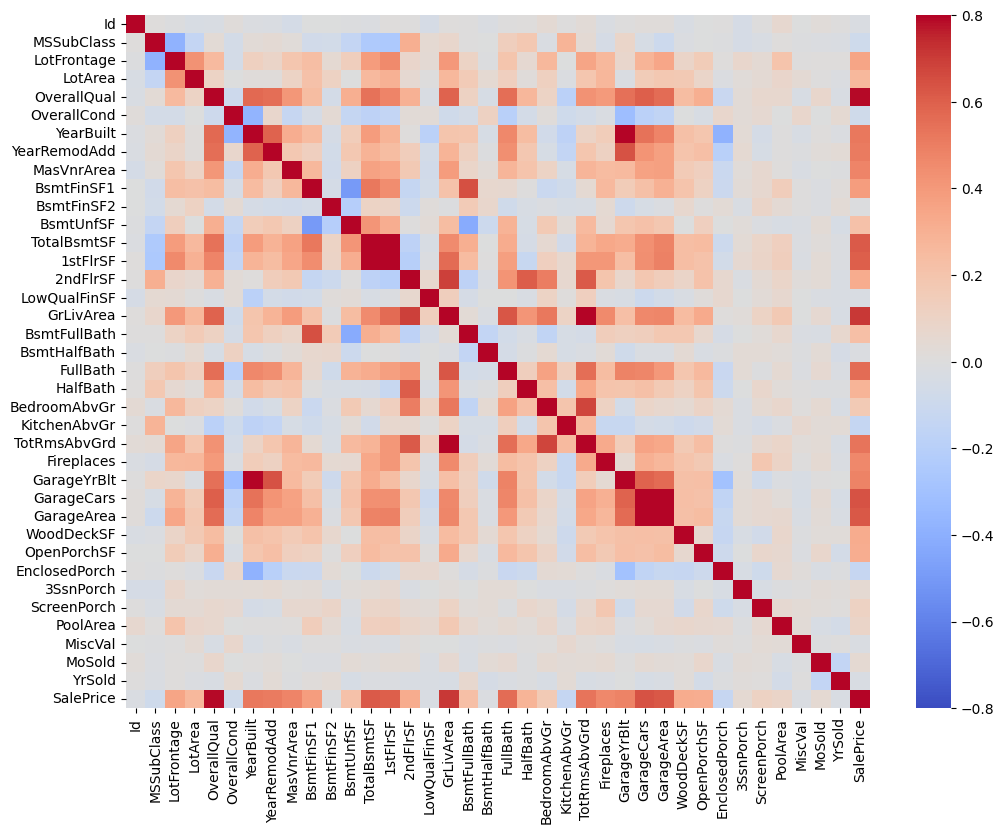

In [19]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True)
#sns.heatmap(corrmat, vmin=-.8, vmax=.8, center= 0)
sns.heatmap(corrmat, vmin=-.8, vmax=.8, center= 0, cmap= 'coolwarm')

Максимальная прямая корреляция:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF


**ТОП-10 признаков**

Return the first n rows ordered by columns in descending order.

Return the first n rows with the largest values in columns, in
descending order.

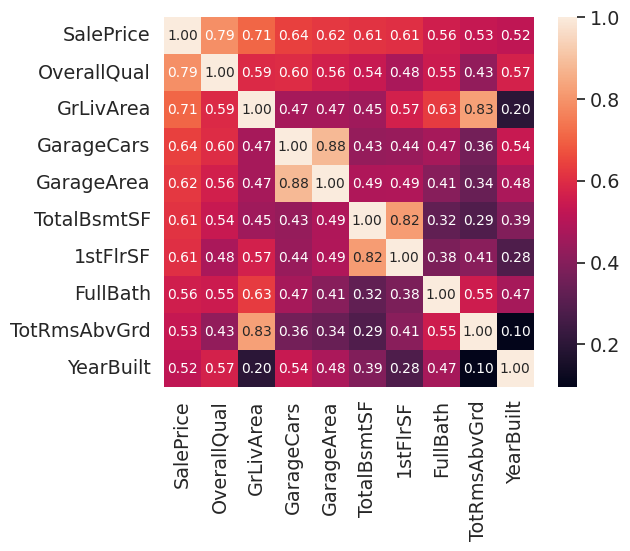

In [20]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

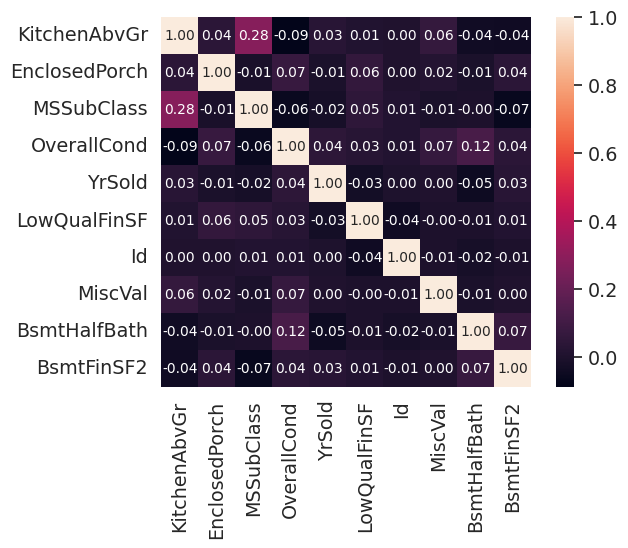

In [21]:
k = 10
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Визуализация зависимостей признаков

Стоимость жилья в зависимости от жилой площади

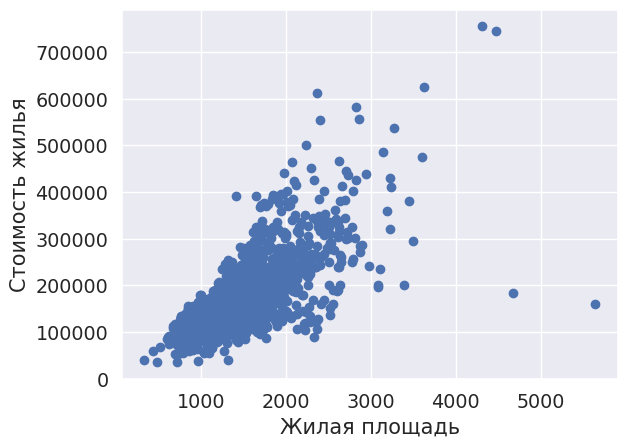

In [22]:
plt.scatter(train['GrLivArea'], y_train )
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость жилья')
plt.show()

Стоимость жилья в зависимости от площади подвала

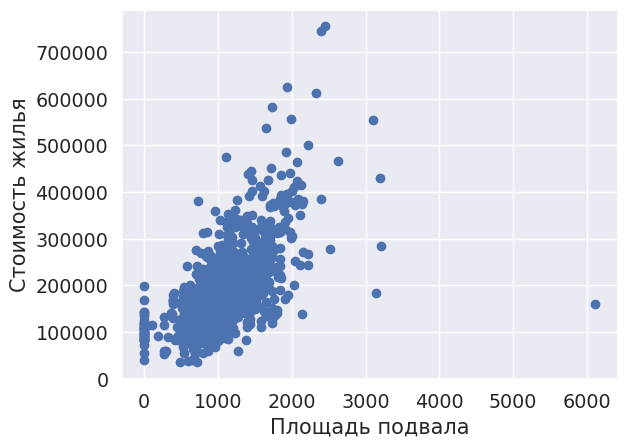

In [23]:
plt.scatter(train['TotalBsmtSF'], y_train )
plt.xlabel('Площадь подвала')
plt.ylabel('Стоимость жилья')
plt.show()

## Очистка данных

In [24]:
def clear_data(df):
    # Источник - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

    # Заполняем отсутствующие значения
    # Alley : data description says NA means "no alley access"
    df["Alley"] = df["Alley"].fillna("None")
    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
    # Condition : NA most likely means Normal
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
    # Functional : data description says NA means typical
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
    # MasVnrType : NA most likely means no veneer
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
    # ScreenPorch : NA most likely means no screen porch
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

    # Представляем некоторые категориальные значения в виде числовых
    # если есть информация о порядке
    df = df.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

    # Некоторые числовые переменные на самом деле категориальные
    df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

    return df

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [25]:
train = clear_data(train)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Разделяем числовые (int64, float64) и категориальные (object) признаки

- Категориальные данные представим в формате one-hot encoding
- Числовые данные необходимо нормализовать

In [27]:
# формируем список категориальных данных
categorical_features = train.select_dtypes(include = ["object"]).columns
# формируем список числовых данных
numerical_features = train.select_dtypes(exclude = ["object"]).columns

In [28]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
numerical_features

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

Убираем из списка числовых переменных 'Id' и 'SalePrice'

In [30]:
numerical_features = numerical_features.drop("Id")
numerical_features = numerical_features.drop("SalePrice")

In [31]:
numerical_features

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold'],
      dtype='object')

Разделяем данные на числовые и категориальные

In [32]:
# выберем необходимые столбцы по их названиям
train_numerical = train[numerical_features]
train_categorical = train[categorical_features]

In [33]:
# числовые признаки
train_numerical[:5]

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold
0,65.0,8450,2,0,4,4,3,7,5,2003,...,2,0,61,0,0,0,0,0,0,2008
1,80.0,9600,2,0,4,4,3,6,8,1976,...,2,298,0,0,0,0,0,0,0,2007
2,68.0,11250,2,0,3,4,3,7,5,2001,...,2,0,42,0,0,0,0,0,0,2008
3,60.0,9550,2,0,3,4,3,7,5,1915,...,2,0,35,272,0,0,0,0,0,2006
4,84.0,14260,2,0,3,4,3,8,5,2000,...,2,192,84,0,0,0,0,0,0,2008


In [34]:
# категориальные признаки
train_categorical[:5]

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Heating,CentralAir,Electrical,GarageType,GarageFinish,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Attchd,RFn,No,No,Feb,WD,Normal
1,SC20,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,GasA,Y,SBrkr,Attchd,RFn,No,No,May,WD,Normal
2,SC60,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Attchd,RFn,No,No,Sep,WD,Normal
3,SC70,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Detchd,Unf,No,No,Feb,WD,Abnorml
4,SC60,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Attchd,RFn,No,No,Dec,WD,Normal


## Предварительная обработка числовых признаков

Определим количество пустых значений числовых признаков (isnull())

In [35]:
train_numerical.isnull().values.sum()

81

Варианты заполнения пустых значений - заполнить медианными или средними значениями

In [36]:
train_numerical = train_numerical.fillna(train_numerical.median()) # заполнение медианными значениями

Проверяем количество пустых значений числовых признаков

In [37]:
train_numerical.isnull().values.sum()

0

## Нормализуем числовые признаки

In [38]:
# Среднее значение
mean = train_numerical.mean(axis=0)
# Стандартное отклонение
std = train_numerical.std(axis=0)
train_numerical -= mean
train_numerical /= std

## Предварительная обработка категориальных значений

In [39]:
train_categorical['BldgType'].describe()

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [40]:
# посмотрим на набор значений категории
set(train_categorical['BldgType'])

{'1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'}

**pandas.get_dummies**

Convert categorical variable into dummy/indicator variables

Документация:

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.get_dummies.html


In [41]:
'''конвертируем категориальные признаки
   в формат one-hot encoding
   при помощи функции get_dummies'''
blgd_type_dummy = pd.get_dummies(train_categorical['BldgType']) # для одной категории

In [42]:
blgd_type_dummy[5:15]

,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,0,1,0,0,0
10,1,0,0,0,0
11,1,0,0,0,0
12,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0


In [43]:
# конвертируем категориальные признаки в формат one-hot encoding для всех категорий
train_categorical = pd.get_dummies(train_categorical)

In [44]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 200 entries, MSSubClass_SC120 to SaleCondition_Partial
dtypes: uint8(200)
memory usage: 285.3 KB


In [45]:
train_categorical[:5]

,MSSubClass_SC120,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


Проверяем количество пустых значений категориальных признаков

In [46]:
train_categorical.isnull().values.sum()

0

## Готовим общий набор данных

In [47]:
# Объединим числовые и категориальные данные по столбцам
# Concatenate pandas objects along a particular axis
x_train = pd.concat([train_numerical, train_categorical], axis = 1)

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 254 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(54), uint8(200)
memory usage: 901.2 KB


In [49]:
#x_train[:5]
x_train.head()

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.212804,-0.207071,0.064216,-0.242942,0.701051,0.026171,0.225639,0.651256,-0.517023,1.050634,...,0,0,0,1,0,0,0,0,1,0
1,0.645526,-0.091855,0.064216,-0.242942,0.701051,0.026171,0.225639,-0.071812,2.178881,0.156680,...,0,0,0,1,0,0,0,0,1,0
2,0.299349,0.073455,0.064216,-0.242942,-1.016288,0.026171,0.225639,0.651256,-0.517023,0.984415,...,0,0,0,1,0,0,0,0,1,0
3,0.068564,-0.096864,0.064216,-0.242942,-1.016288,0.026171,0.225639,0.651256,-0.517023,-1.862993,...,0,0,0,1,1,0,0,0,0,0
4,0.760919,0.375020,0.064216,-0.242942,-1.016288,0.026171,0.225639,1.374324,-0.517023,0.951306,...,0,0,0,1,0,0,0,0,1,0


In [50]:
x_train.shape

(1460, 254)

## Создаем нейронную сеть

In [102]:
from keras.layers import Dropout
from keras.regularizers import l2
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu', kernel_regularizer=l2(0.01)))

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               51000     
                                                                 
 dense_11 (Dense)            (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 100)               5100      
                                                                 
 dense_13 (Dense)            (None, 25)                2525      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 68701 (268.36 KB)
Trainable params: 6870

In [104]:
model.compile(optimizer='adadelta', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть

In [105]:
history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/1000
42/42 - 2s - loss: 39366184960.0000 - mae: 181505.1562 - val_loss: 36096520192.0000 - val_mae: 175664.3125 - 2s/epoch - 36ms/step
Epoch 2/1000
42/42 - 0s - loss: 39366180864.0000 - mae: 181505.1250 - val_loss: 36096516096.0000 - val_mae: 175664.2969 - 181ms/epoch - 4ms/step
Epoch 3/1000
42/42 - 0s - loss: 39366172672.0000 - mae: 181505.1562 - val_loss: 36096516096.0000 - val_mae: 175664.2969 - 163ms/epoch - 4ms/step
Epoch 4/1000
42/42 - 0s - loss: 39366176768.0000 - mae: 181505.1406 - val_loss: 36096516096.0000 - val_mae: 175664.2969 - 166ms/epoch - 4ms/step
Epoch 5/1000
42/42 - 0s - loss: 39366176768.0000 - mae: 181505.1250 - val_loss: 36096512000.0000 - val_mae: 175664.2969 - 168ms/epoch - 4ms/step
Epoch 6/1000
42/42 - 0s - loss: 39366168576.0000 - mae: 181505.1250 - val_loss: 36096512000.0000 - val_mae: 175664.2812 - 181ms/epoch - 4ms/step
Epoch 7/1000
42/42 - 0s - loss: 39366168576.0000 - mae: 181505.1094 - val_loss: 36096512000.0000 - val_mae: 175664.2812 - 177ms/epoc

## Готовим данные для предсказания

In [106]:
test = pd.read_csv('test.csv')

In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [108]:
'''Проверим наличие столбцов в тестовой выборке
   на соответствие обучающей выборке.'''
check_columns = [] # список с отсутствующими столбцами
for column in train.columns:
    if column not in test.columns:
        check_columns.append(column)

In [109]:
check_columns

['SalePrice']

In [110]:
# обработка данных
test = clear_data(test)

In [111]:
# разделение данных на числовые и категориальные
test_numerical = test[numerical_features]
test_categorical = test[categorical_features]

In [112]:
# заполнение пустых значений (пропусков)
test_numerical = test_numerical.fillna(test_numerical.median())

In [113]:
# нормализация тестовых данных с использованием значений mean и std для обучающих данных
test_numerical -= mean
test_numerical /= std

In [114]:
# конвертирование категориальных признаков в формат one-hot encoding
test_categorical = pd.get_dummies(test_categorical)

In [115]:
'''Проверим наличие столбцов в тестовой выборке
   согласно обучающей выборке по значениям категориальных признаков.
   Если столбец в тестовой выборке отсутствует,
   добавим его и заполним значения нулями. '''
additional_columns = [] # список с отсутствующими столбцами
for column in train_categorical.columns:
    if column not in test_categorical.columns:
        additional_columns.append(column)
        test_categorical[column] = 0

In [116]:
additional_columns

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'MiscFeature_TenC']

In [117]:
# Объединим числовые и категориальные данные по столбцам согласно порядку в обучающем наборе данных
x_test = pd.concat([test_numerical[train_numerical.columns], test_categorical[train_categorical.columns]], axis = 1)

In [118]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 254 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(54), int64(15), uint8(185)
memory usage: 1.0 MB


In [119]:
x_test.shape

(1459, 254)

## Запускаем предсказание

In [120]:
predictions = model.predict(x_test)

46/46 [==============================] - 0s 2ms/step


In [121]:
# посмотрим на предсказанные значения стоимости недвижимости
predictions[10:20]

array([[184680.31],
       [112722.01],
       [107483.9 ],
       [151910.12],
       [117647.56],
       [302619.6 ],
       [252108.31],
       [271798.38],
       [274695.22],
       [320558.4 ]], dtype=float32)

## Готовим решение для Kaggle

In [122]:
out = np.column_stack((test['Id'], predictions)) # добавляем Id

In [123]:
out[:10]

array([[  1461.      ,  97852.890625],
       [  1462.      , 162454.703125],
       [  1463.      , 214306.65625 ],
       [  1464.      , 252820.03125 ],
       [  1465.      , 184535.109375],
       [  1466.      , 219856.53125 ],
       [  1467.      , 172561.890625],
       [  1468.      , 227643.125   ],
       [  1469.      , 198599.203125],
       [  1470.      , 138489.      ]])

In [124]:
np.savetxt('submission.csv', out, header="Id,SalePrice",
            comments="", fmt="%d,%f")

In [125]:
!head submission.csv

Id,SalePrice
1461,97852.890625
1462,162454.703125
1463,214306.656250
1464,252820.031250
1465,184535.109375
1466,219856.531250
1467,172561.890625
1468,227643.125000
1469,198599.203125


## Отправляем решение на Kaggle

In [126]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -m "Baseline submition from Colab" -f submission.csv

100% 26.9k/26.9k [00:01<00:00, 18.4kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

## Задание

Примите участие в соревновании - https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Улучшайте решение, чтобы занять более высокое место в соревновании. Для этого:

1. Изучите подготовку данных в опубликованных решениях:
    - https://www.kaggle.com/apapiu/regularized-linear-models
    - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
    - https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
    - https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

    Попробуйте применять подходы из этих решений.

2. Изменяйте архитектуру нейронной сети:
   - Добавьте еще один или два слоя в сеть, удалите один из слоев.
   - Изменяйте количество нейронов на каждом слое: уменьшите в два раза, увеличите в два раза.
   - Добавьте регуляризацию: Dropout, L2 или L1.
   
3. Изменяйте метод обучения нейронной сети:
    - Используйте разные оптимизаторы ('SGD', 'adam', 'rmsprop', 'adadelta').
    - Изменяйте размер мини-выборки.
    - Изменяйте размер параметра скорости обучения.

4. Удалите выбросы из обучающего набора данных (дома с площадью более 4000).

5. Удалите из набора данных признаки с высокой корреляцией (связанные между собой). Смотрите примеры в ноутбуках из пункта 1.

6. Добавьте производных признаков в данные для обучения (смотрите примеры в ноутбуках из пункта 1).



#Справочная информация
- Pandas. Работа с данными https://devpractice.ru/kniga-pandas/
- Аналитикам: большая шпаргалка по Pandas. https://smysl.io/blog/pandas/
- Matplotlib. Уроки. https://devpractice.ru/matplotlib-lessons/
- Обзор основных техник Feature Engineering

  https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/
- Искусство Feature Engineering в машинном обучении
  https://habr.com/ru/company/mlclass/blog/248129/

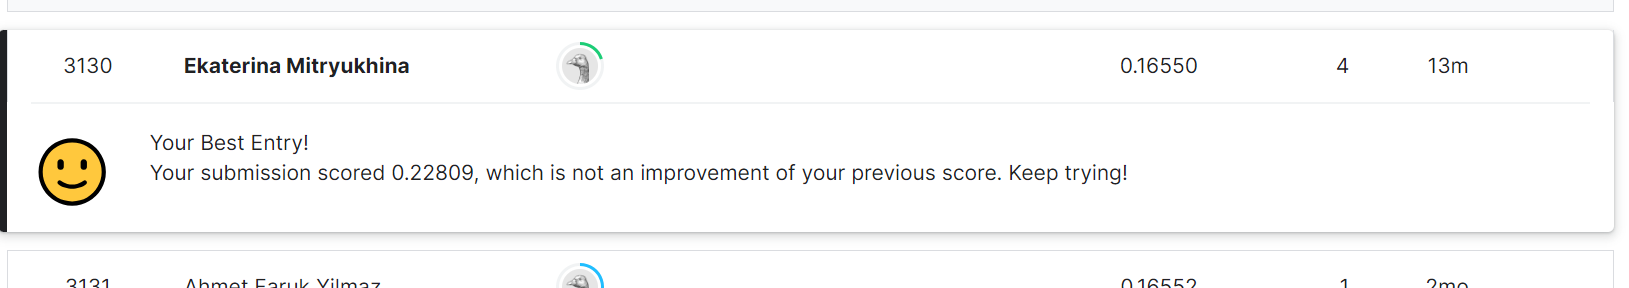